In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
df = pd.read_csv('vgsales.csv')

In [25]:
df = df.dropna()

In [26]:
dataset = df[['Publisher', 'Platform', 'Genre', 'Global_Sales']]

In [27]:
dfpgp = df[['Publisher', 'Platform', 'Genre', 'Global_Sales']]

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dfpgp = df[['Publisher', 'Platform', 'Genre', 'Global_Sales']]

dfpgp['Genre'] = label_encoder.fit_transform(dfpgp['Genre'])
dfpgp['Publisher'] = label_encoder.fit_transform(dfpgp['Publisher'])
dfpgp['Platform'] = label_encoder.fit_transform(dfpgp['Platform'])

<ipython-input-28-ccf52062e67b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpgp['Genre'] = label_encoder.fit_transform(dfpgp['Genre'])
<ipython-input-28-ccf52062e67b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpgp['Publisher'] = label_encoder.fit_transform(dfpgp['Publisher'])
<ipython-input-28-ccf52062e67b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [29]:
X = dfpgp.drop('Global_Sales', axis=1)

Y = dfpgp['Global_Sales']

In [30]:
X

,Publisher,Platform,Genre
0,359,26,10
1,359,11,4
2,359,26,6
3,359,26,10
4,359,5,7
...,...,...,...
16593,269,6,4
16594,241,7,8
16595,21,16,6
16596,8,4,5


In [99]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8)

In [100]:
x_train.shape, y_train.shape

((3258, 3), (3258,))

In [101]:
x_test.shape, y_test.shape

((13033, 3), (13033,))

In [102]:
import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.209
Date:                Sun, 28 Mar 2021   Prob (F-statistic):            0.00558
Time:                        16:17:55   Log-Likelihood:                -5523.5
No. Observations:                3258   AIC:                         1.106e+04
Df Residuals:                    3254   BIC:                         1.108e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2993      0.071      4.200      0.0

In [103]:
linear_reg = LinearRegression(normalize=True).fit(x_train, y_train)

linear_reg

LinearRegression(normalize=True)

In [104]:
print("Training_score : " , linear_reg.score(x_train, y_train))

Training_score :  0.0038653227345344376


In [105]:
print("Training_score : " , linear_reg.score(x_train, y_train))

Training_score :  0.0038653227345344376


In [106]:
y_pred = linear_reg.predict(x_test)

In [107]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.0010074228113943207


In [108]:
def adjusted_r2(r_square, labels, features):
    
    adj_r_square = 1 - ((1 - r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1] - 1)
    
    return adj_r_square

In [109]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.0007773991924239221


In [110]:
predictors = x_train.columns

coef = pd.Series(linear_reg.coef_, predictors).sort_values()

print(coef)

Publisher    0.000326
Platform     0.005573
Genre        0.010734
dtype: float64


In [111]:
y_pred = linear_reg.predict(x_test)

In [112]:
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.0010074228113943207


In [113]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.0007773991924239221


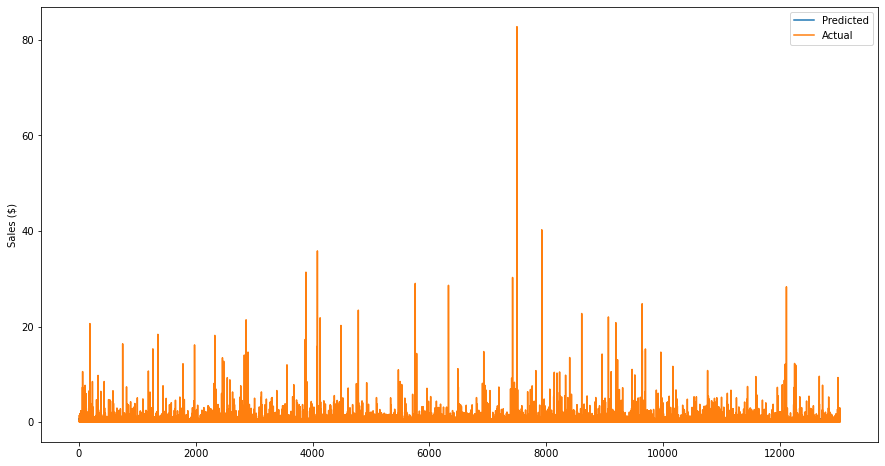

In [114]:
plt.figure(figsize = (15, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel("Sales ($)")
plt.legend()
plt.show()